<a href="https://colab.research.google.com/github/PhanTung-06/CS114.L21/blob/main/ProcessDataWecode/Predict_Score_FinallVersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**I. IMPORT**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# wecode = pd.read_csv('/content/drive/MyDrive/Data/CS114/wecode.csv')
# score = pd.read_csv('/content/drive/MyDrive/Data/CS114/score_training.csv')

wecode = pd.read_csv('/content/drive/MyDrive/CS114/wecode.csv')
score = pd.read_csv('/content/drive/MyDrive/CS114/score_training.csv')


#**II. HANDLING WECODE FILE**

In [7]:
new_wecode = pd.DataFrame(wecode['user_id'])
new_wecode['Sum_Problems'] = pd.DataFrame(wecode['is_final'])
new_wecode.insert(2,'Sum_Submits', 1)
new_wecode['Sum_Correct_Submits'] = pd.DataFrame(map(int, (wecode['pre_score'] == 10000)))
new_wecode['Sum_Correct_Problems'] = pd.DataFrame(map(int, (wecode['pre_score'] == 10000) & (wecode['is_final'] == 1)))
new_wecode['Sum_Last_Scores'] = wecode.loc[wecode['is_final'] == 1, ['pre_score']]
new_wecode.columns = ['id', 'Sum_Problems', 'Sum_Submits','Sum_Correct_Submits', 'Sum_Correct_Problems', 'Sum_Last_Scores']
new_wecode = new_wecode.groupby(['id']).sum()

###**Idea_1**

In [8]:
new_wecode['Idea_1'] = new_wecode['Sum_Correct_Problems'] / new_wecode['Sum_Problems'] 

In [9]:
new_wecode['Idea_1']

id
1       0.500000
4       0.973684
5       0.600000
6       0.965909
7       0.000000
          ...   
1860    0.583333
1862    0.666667
1864    0.444444
1865    0.588235
1868    1.000000
Name: Idea_1, Length: 1159, dtype: float64

###**Idea_2**

In [10]:
new_wecode['Idea_2'] = new_wecode['Sum_Problems'] / new_wecode['Sum_Submits']

###**Idea_3**

In [11]:
new_wecode['Idea_3'] = new_wecode['Sum_Correct_Submits'] / new_wecode['Sum_Submits']

###**Idea_4**

In [12]:
new_wecode['Idea_4'] = new_wecode['Sum_Last_Scores']

###**Idea_5**

In [13]:
#Đếm số problem có trong mỗi assignment
count_problem_in_each_assignment = wecode.groupby('assignment_id', as_index=False).problem_id.nunique()
count_problem_in_each_assignment.rename(columns={'problem_id':'count_problem'}, inplace=True)
count_problem_in_each_assignment

,assignment_id,count_problem
0,0,352
1,5,4
2,7,10
3,8,8
4,10,7
...,...,...
285,376,10
286,377,7
287,381,4
288,383,47


In [14]:
#Đếm số problem đã nộp ở mỗi assignment của mỗi user_id
count_problem_submit_userid = wecode[['user_id', 'assignment_id','problem_id']]
count_problem_submit_userid = count_problem_submit_userid.groupby(['user_id', 'assignment_id'], as_index=False).problem_id.nunique()
count_problem_submit_userid.sort_values(by='user_id')
count_problem_submit_userid.rename(columns={'problem_id':'count_submited_problem'}, inplace=True)
count_problem_submit_userid

,user_id,assignment_id,count_submited_problem
0,1,0,2
1,4,0,41
2,5,64,1
3,5,91,2
4,5,117,1
...,...,...,...
12360,1865,296,4
12361,1868,0,13
12362,1868,271,5
12363,1868,272,5


In [15]:
#Tính tỉ lệ problem làm được ở mỗi assignment của mỗi user_id
submited_problem_div_total_problem = count_problem_submit_userid.merge(count_problem_in_each_assignment, how='left', on='assignment_id')
submited_problem_div_total_problem['ratio'] = submited_problem_div_total_problem['count_submited_problem']/submited_problem_div_total_problem['count_problem']
submited_problem_div_total_problem

,user_id,assignment_id,count_submited_problem,count_problem,ratio
0,1,0,2,352,0.005682
1,4,0,41,352,0.116477
2,5,64,1,9,0.111111
3,5,91,2,10,0.200000
4,5,117,1,11,0.090909
...,...,...,...,...,...
12360,1865,296,4,10,0.400000
12361,1868,0,13,352,0.036932
12362,1868,271,5,5,1.000000
12363,1868,272,5,5,1.000000


In [16]:
#Tính trung bình tỉ lệ 
average_of_ratio = pd.DataFrame(submited_problem_div_total_problem[['user_id', 'ratio']])
average_of_ratio = average_of_ratio.groupby('user_id', as_index=False).ratio.mean()
average_of_ratio.rename(columns={'ratio': 'average_of_ratio'}, inplace=True)
average_of_ratio

,user_id,average_of_ratio
0,1,0.005682
1,4,0.116477
2,5,0.114394
3,6,0.306203
4,7,0.005682
...,...,...
1154,1860,0.615000
1155,1862,0.450000
1156,1864,0.690000
1157,1865,0.588889


In [17]:
#Merge
average_of_ratio.rename(columns={'user_id': 'id'}, inplace=True)
average_of_ratio.rename(columns={'average_of_ratio': 'Idea_5'}, inplace=True)
new_wecode = new_wecode.merge(average_of_ratio, how='left', on='id')

###**Idea_6**

In [18]:
new_wecode['Idea_6_1'] = new_wecode['Sum_Last_Scores']
new_wecode['Idea_6_2'] = new_wecode['Sum_Submits']

###**Idea_7**

In [19]:
from datetime import date
import re

In [20]:
def MinusTime(time1, time2): #time2 - time1
  time1 = str(time1)
  time2 = str(time2)
  date1 = date(int(time1[0:4]), int(time1[4:6]), int(time1[6:8]))
  date2 = date(int(time2[0:4]), int(time2[4:6]), int(time2[6:8]))
  if len(time1) == 14:
    H1 = int(time1[8:10])*3600 + int(time1[10:12])*60 + int(time1[12:14])
  else:
    H1 = int(time1[8:9])*3600 + int(time1[9:11])*60 + int(time1[11:13])
  if len(time2) == 14:
    H2 = int(time2[8:10])*3600 + int(time2[10:12])*60 + int(time2[12:14])
  else:
    H2 = int(time2[8:9])*3600 + int(time2[9:11])*60 + int(time2[11:13])
  sub_time = (date2 - date1).days * 24 * 3600 - H1 + H2
  return sub_time

In [21]:
def ConvertTimeToInt(x):
  t = ''.join(re.findall("\d", x))
  if len(t) == 13:
    t = t[0:8] + '0' + t[8:13]
  return int(t)

In [22]:
print(MinusTime(20201108143547, 2021010744205))

5148378


In [23]:
wecode_sort_userid=wecode.sort_values(by='user_id')

In [24]:
wecode_sort_userid['created_at_int'] = wecode_sort_userid['created_at'].apply(lambda x: ConvertTimeToInt(x))
wecode_sort_userid['updated_at_int'] = wecode_sort_userid['updated_at'].apply(lambda x: ConvertTimeToInt(x))

In [25]:
wecode_sort_userid

,id,assignment_id,problem_id,user_id,is_final,status,pre_score,coefficient,file_name,language_id,created_at,updated_at,created_at_int,updated_at_int
13940,14008,0,81,1,1,Compilation Error,0,100,solution-1791,2,2020-11-08 16:50:50,2020-11-08 16:50:50,20201108165050,20201108165050
84860,84971,0,370,1,1,SCORE,10000,100,solution-2367,2,2020-12-01 01:59:52,2020-12-01 02:00:05,20201201015952,20201201020005
18060,18146,0,139,4,1,SCORE,10000,100,solution-1862,2,2020-11-10 14:45:31,2020-11-10 14:45:40,20201110144531,20201110144540
18218,18304,0,140,4,0,SCORE,10000,100,solution-1865,2,2020-11-10 15:21:27,2020-11-10 15:23:54,20201110152127,20201110152354
18361,18447,0,141,4,0,SCORE,9000,100,solution-1869,2,2020-11-10 15:56:39,2020-11-10 16:00:00,20201110155639,20201110160000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236800,236913,0,638,1868,0,SCORE,10000,100,solution-3318,2,2021-01-22 15:38:10,2021-01-22 15:38:20,20210122153810,20210122153820
236788,236901,0,638,1868,0,SCORE,8000,100,solution-3317,2,2021-01-22 15:33:55,2021-01-22 15:34:04,20210122153355,20210122153404
234349,234462,0,639,1868,1,SCORE,10000,100,solution-3308,2,2021-01-21 14:21:23,2021-01-21 14:21:33,20210121142123,20210121142133
211358,211471,0,585,1868,1,SCORE,10000,100,solution-3089,2,2021-01-14 17:44:24,2021-01-14 17:44:34,20210114174424,20210114174434


In [26]:
a = wecode_sort_userid.groupby(['user_id', 'assignment_id', 'problem_id'], as_index=False)['created_at_int'].min()
b = wecode_sort_userid.groupby(['user_id', 'assignment_id', 'problem_id'], as_index=False)['updated_at_int'].max()
diff_time = a.merge(b, how='left', on=['user_id', 'assignment_id', 'problem_id'])

In [27]:
diff_time['diff_time'] = diff_time.apply(lambda x: MinusTime(x['created_at_int'], x['updated_at_int']), axis = 1)

In [28]:
diff_time = diff_time[['user_id', 'diff_time']]
average_diff_time = diff_time.groupby('user_id', as_index=False).mean()
average_diff_time.rename(columns={'diff_time':'average_diff_time'}, inplace=True)
average_diff_time.rename(columns={'user_id':'id'}, inplace=True)
average_diff_time

,id,average_diff_time
0,1,6.500000
1,4,148.926829
2,5,492.600000
3,6,2488.325843
4,7,1162.000000
...,...,...
1154,1860,98835.062500
1155,1862,458.000000
1156,1864,17946.222222
1157,1865,46922.941176


In [29]:
#Merge
new_wecode = new_wecode.merge(average_diff_time, how='left', on='id')
new_wecode.rename(columns={'average_diff_time': 'Idea_7'}, inplace=True)

In [30]:
new_wecode  

,id,Sum_Problems,Sum_Submits,Sum_Correct_Submits,Sum_Correct_Problems,Sum_Last_Scores,Idea_1,Idea_2,Idea_3,Idea_4,Idea_5,Idea_6_1,Idea_6_2,Idea_7
0,1,2,2,1,1,10000.0,0.500000,1.000000,0.500000,10000.0,0.005682,10000.0,2,6.500000
1,4,38,54,44,37,370000.0,0.973684,0.703704,0.814815,370000.0,0.116477,370000.0,54,148.926829
2,5,5,6,3,3,30000.0,0.600000,0.833333,0.500000,30000.0,0.114394,30000.0,6,492.600000
3,6,88,130,89,85,850000.0,0.965909,0.676923,0.684615,850000.0,0.306203,850000.0,130,2488.325843
4,7,2,5,0,0,9209.0,0.000000,0.400000,0.000000,9209.0,0.005682,9209.0,5,1162.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,1860,48,76,29,28,329665.0,0.583333,0.631579,0.381579,329665.0,0.615000,329665.0,76,98835.062500
1155,1862,6,12,4,4,40000.0,0.666667,0.500000,0.333333,40000.0,0.450000,40000.0,12,458.000000
1156,1864,63,187,30,28,439741.0,0.444444,0.336898,0.160428,439741.0,0.690000,439741.0,187,17946.222222
1157,1865,17,99,10,10,116428.0,0.588235,0.171717,0.101010,116428.0,0.588889,116428.0,99,46922.941176


###**Idea_8**

#**III. HANDLING SCORE FILE**

In [31]:
CK = score[['id','CK']]
CK

,id,CK
0,22,8.5
1,24,9.5
2,27,10
3,28,9.5
4,29,8.5
...,...,...
970,1857,4
971,1859,1.5
972,1862,7.5
973,1865,7.5


# **IV. MERGE**

In [32]:
data_merge = pd.merge(new_wecode,CK,on='id',how='outer')
data_merge

,id,Sum_Problems,Sum_Submits,Sum_Correct_Submits,Sum_Correct_Problems,Sum_Last_Scores,Idea_1,Idea_2,Idea_3,Idea_4,Idea_5,Idea_6_1,Idea_6_2,Idea_7,CK
0,1,2.0,2.0,1.0,1.0,10000.0,0.500000,1.000000,0.500000,10000.0,0.005682,10000.0,2.0,6.500000,NaN
1,4,38.0,54.0,44.0,37.0,370000.0,0.973684,0.703704,0.814815,370000.0,0.116477,370000.0,54.0,148.926829,NaN
2,5,5.0,6.0,3.0,3.0,30000.0,0.600000,0.833333,0.500000,30000.0,0.114394,30000.0,6.0,492.600000,NaN
3,6,88.0,130.0,89.0,85.0,850000.0,0.965909,0.676923,0.684615,850000.0,0.306203,850000.0,130.0,2488.325843,NaN
4,7,2.0,5.0,0.0,0.0,9209.0,0.000000,0.400000,0.000000,9209.0,0.005682,9209.0,5.0,1162.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,1638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.5
1277,1664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1278,1679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1279,1723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9


In [33]:
data_merge = data_merge.dropna()

In [34]:
data_merge

,id,Sum_Problems,Sum_Submits,Sum_Correct_Submits,Sum_Correct_Problems,Sum_Last_Scores,Idea_1,Idea_2,Idea_3,Idea_4,Idea_5,Idea_6_1,Idea_6_2,Idea_7,CK
9,24,77.0,164.0,80.0,72.0,750299.0,0.935065,0.469512,0.487805,750299.0,0.663333,750299.0,164.0,47079.641026,9.5
10,27,5.0,13.0,4.0,3.0,39000.0,0.600000,0.384615,0.307692,39000.0,0.223643,39000.0,13.0,1100.800000,10
11,29,80.0,199.0,75.0,72.0,762760.0,0.900000,0.402010,0.376884,762760.0,0.807911,762760.0,199.0,47853.187500,8.5
13,34,84.0,218.0,81.0,81.0,822888.0,0.964286,0.385321,0.371560,822888.0,0.854545,822888.0,218.0,46997.107143,6.5
14,35,151.0,297.0,152.0,145.0,1477000.0,0.960265,0.508418,0.511785,1477000.0,0.901952,1477000.0,297.0,17657.184211,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,1856,31.0,64.0,23.0,23.0,270790.0,0.741935,0.484375,0.359375,270790.0,0.710000,270790.0,64.0,63377.193548,7.5
1152,1857,40.0,55.0,37.0,37.0,386000.0,0.925000,0.727273,0.672727,386000.0,0.891667,386000.0,55.0,99.925000,4
1153,1859,30.0,31.0,3.0,3.0,39000.0,0.100000,0.967742,0.096774,39000.0,0.557143,39000.0,31.0,9.766667,1.5
1155,1862,6.0,12.0,4.0,4.0,40000.0,0.666667,0.500000,0.333333,40000.0,0.450000,40000.0,12.0,458.000000,7.5


In [35]:
data_merge['CK'] = data_merge['CK'].apply(pd.to_numeric, errors='coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
data_merge.isnull().sum()

id                       0
Sum_Problems             0
Sum_Submits              0
Sum_Correct_Submits      0
Sum_Correct_Problems     0
Sum_Last_Scores          0
Idea_1                   0
Idea_2                   0
Idea_3                   0
Idea_4                   0
Idea_5                   0
Idea_6_1                 0
Idea_6_2                 0
Idea_7                   0
CK                      46
dtype: int64

In [37]:
data_merge = data_merge.dropna()

In [38]:
data_merge.isnull().sum()

id                      0
Sum_Problems            0
Sum_Submits             0
Sum_Correct_Submits     0
Sum_Correct_Problems    0
Sum_Last_Scores         0
Idea_1                  0
Idea_2                  0
Idea_3                  0
Idea_4                  0
Idea_5                  0
Idea_6_1                0
Idea_6_2                0
Idea_7                  0
CK                      0
dtype: int64

## **VISUALIZATION**

In [39]:
data_plot = data_merge.copy()

In [40]:
data_plot=data_plot.sort_values(by='CK')

In [41]:
data_plot=data_plot.sort_values(by='CK', ascending=False)

### **Idea 1:** Tổng số problem đã solved (is_final = 1 && pre_score=10000) / Tổng số problem có submit

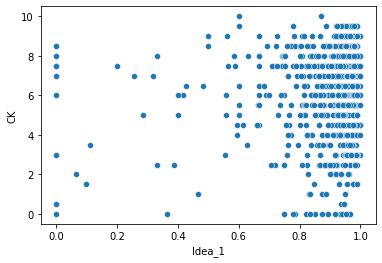

In [42]:
sns.scatterplot(x="Idea_1", y="CK", data=data_plot)

### **Idea 2:** Tổng số problem đã sumbit / Tổng số submissions 


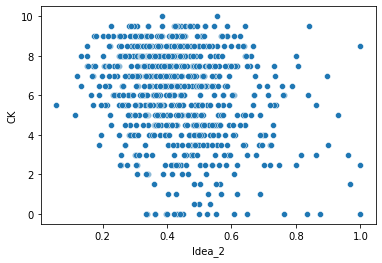

In [43]:
sns.scatterplot(x="Idea_2", y="CK", data=data_plot)

### **Idea 3:** Số lần submit đúng (pre_score=10000) / tổng số submissions


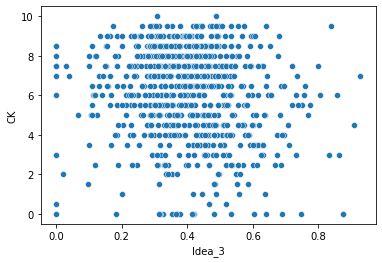

In [44]:
sns.scatterplot(x="Idea_3", y="CK", data=data_plot)

### **Idea 4:** Tổng pre_score của các submssion có is_final = 1 


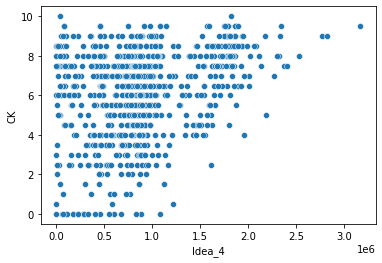

In [45]:
sns.scatterplot(x="Idea_4", y="CK", data=data_plot)

###**Idea_5:** Trung bình cộng của Tỷ lệ: Problem đã submit/số lượng problem của mỗi assignments 

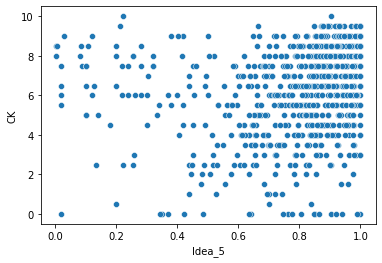

In [46]:
sns.scatterplot(x='Idea_5', y = 'CK', data = data_plot)

### **Idea 6_1:** Tổng của max pre_score của mỗi problem_id


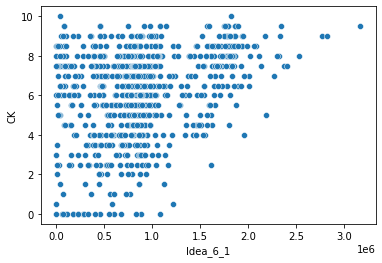

In [47]:
sns.scatterplot(x="Idea_6_1", y="CK", data=data_plot)

### **Idea 6_2:** Tổng số submission


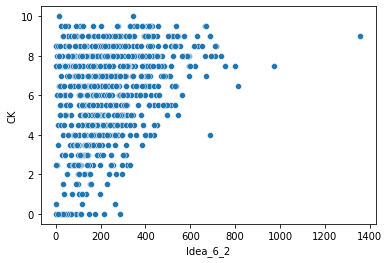

In [48]:
sns.scatterplot(x="Idea_6_2", y="CK", data=data_plot)

###**Idea_7:** Trung bình cộng (Thời điểm submit cuối cùng - Thời điểm submit đầu tiên của mỗi problem)

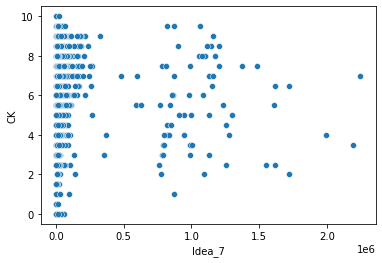

In [49]:
sns.scatterplot(x='Idea_7', y='CK', data=data_plot)

# **V. TRAIN**

In [50]:
train = data_merge.copy()

In [51]:
train

,id,Sum_Problems,Sum_Submits,Sum_Correct_Submits,Sum_Correct_Problems,Sum_Last_Scores,Idea_1,Idea_2,Idea_3,Idea_4,Idea_5,Idea_6_1,Idea_6_2,Idea_7,CK
9,24,77.0,164.0,80.0,72.0,750299.0,0.935065,0.469512,0.487805,750299.0,0.663333,750299.0,164.0,47079.641026,9.5
10,27,5.0,13.0,4.0,3.0,39000.0,0.600000,0.384615,0.307692,39000.0,0.223643,39000.0,13.0,1100.800000,10.0
11,29,80.0,199.0,75.0,72.0,762760.0,0.900000,0.402010,0.376884,762760.0,0.807911,762760.0,199.0,47853.187500,8.5
13,34,84.0,218.0,81.0,81.0,822888.0,0.964286,0.385321,0.371560,822888.0,0.854545,822888.0,218.0,46997.107143,6.5
14,35,151.0,297.0,152.0,145.0,1477000.0,0.960265,0.508418,0.511785,1477000.0,0.901952,1477000.0,297.0,17657.184211,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,1856,31.0,64.0,23.0,23.0,270790.0,0.741935,0.484375,0.359375,270790.0,0.710000,270790.0,64.0,63377.193548,7.5
1152,1857,40.0,55.0,37.0,37.0,386000.0,0.925000,0.727273,0.672727,386000.0,0.891667,386000.0,55.0,99.925000,4.0
1153,1859,30.0,31.0,3.0,3.0,39000.0,0.100000,0.967742,0.096774,39000.0,0.557143,39000.0,31.0,9.766667,1.5
1155,1862,6.0,12.0,4.0,4.0,40000.0,0.666667,0.500000,0.333333,40000.0,0.450000,40000.0,12.0,458.000000,7.5


In [52]:
train = train.drop(columns='Sum_Last_Scores')

In [53]:
train

,id,Sum_Problems,Sum_Submits,Sum_Correct_Submits,Sum_Correct_Problems,Idea_1,Idea_2,Idea_3,Idea_4,Idea_5,Idea_6_1,Idea_6_2,Idea_7,CK
9,24,77.0,164.0,80.0,72.0,0.935065,0.469512,0.487805,750299.0,0.663333,750299.0,164.0,47079.641026,9.5
10,27,5.0,13.0,4.0,3.0,0.600000,0.384615,0.307692,39000.0,0.223643,39000.0,13.0,1100.800000,10.0
11,29,80.0,199.0,75.0,72.0,0.900000,0.402010,0.376884,762760.0,0.807911,762760.0,199.0,47853.187500,8.5
13,34,84.0,218.0,81.0,81.0,0.964286,0.385321,0.371560,822888.0,0.854545,822888.0,218.0,46997.107143,6.5
14,35,151.0,297.0,152.0,145.0,0.960265,0.508418,0.511785,1477000.0,0.901952,1477000.0,297.0,17657.184211,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,1856,31.0,64.0,23.0,23.0,0.741935,0.484375,0.359375,270790.0,0.710000,270790.0,64.0,63377.193548,7.5
1152,1857,40.0,55.0,37.0,37.0,0.925000,0.727273,0.672727,386000.0,0.891667,386000.0,55.0,99.925000,4.0
1153,1859,30.0,31.0,3.0,3.0,0.100000,0.967742,0.096774,39000.0,0.557143,39000.0,31.0,9.766667,1.5
1155,1862,6.0,12.0,4.0,4.0,0.666667,0.500000,0.333333,40000.0,0.450000,40000.0,12.0,458.000000,7.5


In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805 entries, 9 to 1157
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    805 non-null    int64  
 1   Sum_Problems          805 non-null    float64
 2   Sum_Submits           805 non-null    float64
 3   Sum_Correct_Submits   805 non-null    float64
 4   Sum_Correct_Problems  805 non-null    float64
 5   Idea_1                805 non-null    float64
 6   Idea_2                805 non-null    float64
 7   Idea_3                805 non-null    float64
 8   Idea_4                805 non-null    float64
 9   Idea_5                805 non-null    float64
 10  Idea_6_1              805 non-null    float64
 11  Idea_6_2              805 non-null    float64
 12  Idea_7                805 non-null    float64
 13  CK                    805 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 94.3 KB


In [55]:
# import libraries
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,classification_report,roc_curve,plot_roc_curve,auc,precision_recall_curve,plot_precision_recall_curve,average_precision_score

In [56]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# train['CK']= le.fit_transform(train['CK'])

In [57]:
data_CK = train['CK']
data = train.copy()
data.drop(columns=['CK'],inplace=True)

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,data_CK,test_size=0.2,random_state=0)

In [59]:
x_train

,id,Sum_Problems,Sum_Submits,Sum_Correct_Submits,Sum_Correct_Problems,Idea_1,Idea_2,Idea_3,Idea_4,Idea_5,Idea_6_1,Idea_6_2,Idea_7
738,1275,85.0,173.0,80.0,79.0,0.929412,0.491329,0.462428,805888.0,0.858363,805888.0,173.0,25803.674419
67,135,93.0,239.0,96.0,91.0,0.978495,0.389121,0.401674,919288.0,0.945455,919288.0,239.0,20096.634409
448,789,80.0,190.0,82.0,78.0,0.975000,0.421053,0.431579,780000.0,0.751123,780000.0,190.0,862536.012346
545,931,84.0,312.0,90.0,81.0,0.964286,0.269231,0.288462,818888.0,0.840404,818888.0,312.0,50802.559524
383,665,88.0,125.0,87.0,87.0,0.988636,0.704000,0.696000,878888.0,1.000000,878888.0,125.0,85605.670455
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,1665,47.0,62.0,47.0,46.0,0.978723,0.758065,0.758065,460000.0,1.000000,460000.0,62.0,27728.510638
233,435,86.0,154.0,86.0,86.0,1.000000,0.558442,0.558442,860000.0,0.975000,860000.0,154.0,22859.918605
825,1405,113.0,332.0,117.0,104.0,0.920354,0.340361,0.352410,1087489.0,0.922769,1087489.0,332.0,869138.104348
720,1245,12.0,26.0,9.0,9.0,0.750000,0.461538,0.346154,90000.0,0.240000,90000.0,26.0,50480.333333


In [60]:
# Standardizing our training and testing data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## TRAIN REGRESSTION

In [61]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
y_pre = model.predict(x_test)

In [63]:
y_pre = np.round((y_pre*2))/2

In [64]:
y_pre

array([6.5, 5.5, 5.5, 7.5, 4.5, 4.5, 5.5, 7. , 7.5, 7. , 7. , 7. , 7. ,
       7.5, 6.5, 6.5, 7.5, 6.5, 5.5, 7. , 7. , 5. , 7. , 6. , 7.5, 5.5,
       6. , 7.5, 8.5, 6.5, 5.5, 6.5, 6.5, 4.5, 7.5, 6.5, 6.5, 7. , 6.5,
       5.5, 7.5, 6.5, 7. , 4.5, 7. , 5. , 7.5, 7. , 6. , 6. , 5.5, 6. ,
       5. , 7.5, 5.5, 6. , 7.5, 7.5, 7. , 7. , 6.5, 6.5, 5.5, 7. , 8. ,
       5.5, 6.5, 6.5, 6.5, 3.5, 3. , 5.5, 7. , 6. , 5.5, 6.5, 6.5, 5.5,
       6. , 6.5, 6.5, 5.5, 6.5, 7.5, 5.5, 6. , 7. , 5. , 5.5, 6.5, 7.5,
       7.5, 6. , 7.5, 5.5, 5.5, 6. , 6. , 7.5, 7.5, 6.5, 8. , 5.5, 6. ,
       6. , 7. , 6. , 6.5, 6.5, 7. , 7.5, 6. , 4.5, 3.5, 5.5, 4.5, 5. ,
       6. , 7.5, 7.5, 5.5, 7. , 5. , 7. , 7.5, 7. , 1.5, 6. , 7. , 7.5,
       5.5, 5. , 6. , 5. , 6.5, 4.5, 4. , 7. , 7. , 6.5, 6.5, 5. , 7.5,
       7. , 7. , 8. , 8.5, 5.5, 5. , 5. , 7. , 5.5, 6. , 5.5, 7. , 5.5,
       4.5, 5.5, 6. , 6. , 6. ])

In [65]:
y_test

18     7.5
308    3.5
210    3.5
385    8.0
354    5.5
      ... 
68     7.0
305    5.0
199    6.5
149    3.5
53     5.0
Name: CK, Length: 161, dtype: float64

In [66]:
mse = metrics.mean_squared_error(y_test, y_pre)
print('mse: ',mse)

mse:  4.377329192546584


In [67]:
y_train

738     7.5
67      7.0
448     6.0
545     4.5
383     4.0
       ... 
1008    6.5
233     4.5
825     9.5
720     7.5
894     8.0
Name: CK, Length: 644, dtype: float64

## TRAIN CLASSIFICATION

In [68]:
# Train classification
y_train = np.round(y_train*2)
y_train = y_train.astype(int)

In [69]:
y_train

738     15
67      14
448     12
545      9
383      8
        ..
1008    13
233      9
825     19
720     15
894     16
Name: CK, Length: 644, dtype: int64

In [70]:
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
y_pre = model.predict(x_test)

In [72]:
y_pre = y_pre/2

In [73]:
y_pre

array([4.5, 3. , 4.5, 8.5, 7.5, 7.5, 8. , 8. , 8. , 7. , 8. , 8. , 7. ,
       8.5, 8. , 8. , 8.5, 8. , 7.5, 8. , 8. , 4. , 8. , 7. , 9. , 7. ,
       8. , 7.5, 9. , 8. , 8. , 8. , 8. , 4. , 8.5, 7.5, 8. , 8. , 8. ,
       5.5, 8.5, 6. , 8. , 5.5, 7. , 7.5, 9. , 8.5, 7.5, 6. , 7.5, 7. ,
       3. , 8. , 7.5, 7. , 8.5, 9.5, 8. , 8. , 8. , 7.5, 7.5, 8. , 8.5,
       7.5, 7.5, 7. , 8. , 7.5, 0. , 9. , 8. , 7.5, 9. , 8. , 8. , 6. ,
       7.5, 8. , 8. , 7.5, 8. , 9.5, 7.5, 8. , 8. , 7.5, 5.5, 8. , 8.5,
       8. , 7.5, 9. , 7.5, 6. , 4.5, 7.5, 7.5, 7.5, 8. , 8. , 7. , 7.5,
       8. , 7. , 4.5, 8. , 8. , 8. , 8. , 7. , 5.5, 7. , 7.5, 7.5, 4. ,
       7.5, 9. , 8.5, 6. , 8. , 7.5, 7. , 8.5, 7. , 8.5, 6. , 8. , 9.5,
       7. , 6. , 7. , 0. , 8. , 7.5, 0. , 8. , 8. , 7. , 7. , 7.5, 8.5,
       8. , 8.5, 8.5, 7.5, 7.5, 7. , 7.5, 9.5, 7.5, 7. , 7.5, 8. , 6. ,
       5.5, 9. , 5.5, 7. , 4.5])

In [74]:
y_test

18     7.5
308    3.5
210    3.5
385    8.0
354    5.5
      ... 
68     7.0
305    5.0
199    6.5
149    3.5
53     5.0
Name: CK, Length: 161, dtype: float64

In [75]:
y_test

18     7.5
308    3.5
210    3.5
385    8.0
354    5.5
      ... 
68     7.0
305    5.0
199    6.5
149    3.5
53     5.0
Name: CK, Length: 161, dtype: float64

In [76]:

mse = metrics.mean_squared_error(y_test, y_pre)
print('mse: ',mse)

mse:  7.357142857142857


# **VI. CONCLUSION**
- 2 phương pháp nói trên có thể thấy bài toán classification nhưng thực chất là regression vì regression đưa ra kết quả tốt hơn. ( output vẫn đúng là từng phân lớp theo format điểm thi cuối kỳ)


# **VII. FINAL MODEL**
**Ở trên là các idea tổng hợp từ các nhóm, sau đây là các idea tốt nhất dựa vào visualization mà nhóm em đề xuất**

*   Sum_Problems
*   Sum_Submits
*   Sum_Correct_Submits
*   Sum_Correct_Problems	
*   Sum_Last_Scores







In [77]:
model = data_merge.copy()
model

,id,Sum_Problems,Sum_Submits,Sum_Correct_Submits,Sum_Correct_Problems,Sum_Last_Scores,Idea_1,Idea_2,Idea_3,Idea_4,Idea_5,Idea_6_1,Idea_6_2,Idea_7,CK
9,24,77.0,164.0,80.0,72.0,750299.0,0.935065,0.469512,0.487805,750299.0,0.663333,750299.0,164.0,47079.641026,9.5
10,27,5.0,13.0,4.0,3.0,39000.0,0.600000,0.384615,0.307692,39000.0,0.223643,39000.0,13.0,1100.800000,10.0
11,29,80.0,199.0,75.0,72.0,762760.0,0.900000,0.402010,0.376884,762760.0,0.807911,762760.0,199.0,47853.187500,8.5
13,34,84.0,218.0,81.0,81.0,822888.0,0.964286,0.385321,0.371560,822888.0,0.854545,822888.0,218.0,46997.107143,6.5
14,35,151.0,297.0,152.0,145.0,1477000.0,0.960265,0.508418,0.511785,1477000.0,0.901952,1477000.0,297.0,17657.184211,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,1856,31.0,64.0,23.0,23.0,270790.0,0.741935,0.484375,0.359375,270790.0,0.710000,270790.0,64.0,63377.193548,7.5
1152,1857,40.0,55.0,37.0,37.0,386000.0,0.925000,0.727273,0.672727,386000.0,0.891667,386000.0,55.0,99.925000,4.0
1153,1859,30.0,31.0,3.0,3.0,39000.0,0.100000,0.967742,0.096774,39000.0,0.557143,39000.0,31.0,9.766667,1.5
1155,1862,6.0,12.0,4.0,4.0,40000.0,0.666667,0.500000,0.333333,40000.0,0.450000,40000.0,12.0,458.000000,7.5


In [78]:
model = model.drop(['Idea_1', 'Idea_2', 'Idea_3', 'Idea_4', 'Idea_5', 'Idea_6_1', 'Idea_6_2', 'Idea_7'], axis = 1)
model

,id,Sum_Problems,Sum_Submits,Sum_Correct_Submits,Sum_Correct_Problems,Sum_Last_Scores,CK
9,24,77.0,164.0,80.0,72.0,750299.0,9.5
10,27,5.0,13.0,4.0,3.0,39000.0,10.0
11,29,80.0,199.0,75.0,72.0,762760.0,8.5
13,34,84.0,218.0,81.0,81.0,822888.0,6.5
14,35,151.0,297.0,152.0,145.0,1477000.0,4.5
...,...,...,...,...,...,...,...
1151,1856,31.0,64.0,23.0,23.0,270790.0,7.5
1152,1857,40.0,55.0,37.0,37.0,386000.0,4.0
1153,1859,30.0,31.0,3.0,3.0,39000.0,1.5
1155,1862,6.0,12.0,4.0,4.0,40000.0,7.5


## **VISUALIZATION**

### **1. Sum Problems**

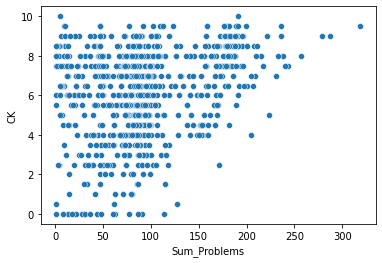

In [79]:
sns.scatterplot(x="Sum_Problems", y="CK", data=model)

### **2. Sum Submits**

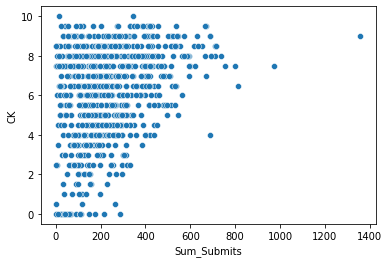

In [80]:
sns.scatterplot(x="Sum_Submits", y="CK", data=model)

### **3. Sum Correct Submits**

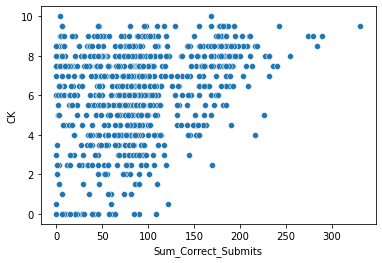

In [81]:
sns.scatterplot(x="Sum_Correct_Submits", y="CK", data=model)

### **4. Sum Correct Problems**

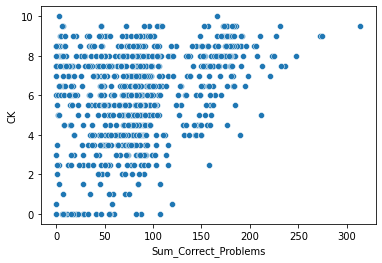

In [82]:
sns.scatterplot(x="Sum_Correct_Problems", y="CK", data=model)

### **5. Sum Last Scores**

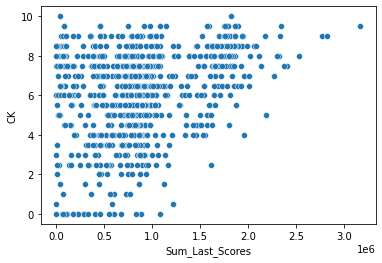

In [83]:
sns.scatterplot(x="Sum_Last_Scores", y="CK", data=model)

## **MODEL**

In [84]:
data_CK = model['CK']
data = model.copy()
data.drop(columns=['CK'],inplace=True)

In [85]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,data_CK,test_size=0.2,random_state=0)
x_train

,id,Sum_Problems,Sum_Submits,Sum_Correct_Submits,Sum_Correct_Problems,Sum_Last_Scores
738,1275,85.0,173.0,80.0,79.0,805888.0
67,135,93.0,239.0,96.0,91.0,919288.0
448,789,80.0,190.0,82.0,78.0,780000.0
545,931,84.0,312.0,90.0,81.0,818888.0
383,665,88.0,125.0,87.0,87.0,878888.0
...,...,...,...,...,...,...
1008,1665,47.0,62.0,47.0,46.0,460000.0
233,435,86.0,154.0,86.0,86.0,860000.0
825,1405,113.0,332.0,117.0,104.0,1087489.0
720,1245,12.0,26.0,9.0,9.0,90000.0


In [86]:
# Standardizing our training and testing data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [87]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
y_pre = model.predict(x_test)

In [89]:
y_pre = np.round((y_pre*2))/2

In [90]:
y_pre

array([6.5, 6. , 5.5, 7. , 4.5, 5. , 5.5, 7. , 7. , 7. , 7. , 6.5, 6.5,
       7. , 6.5, 6. , 7. , 6.5, 4. , 7. , 6.5, 5.5, 6.5, 6. , 7.5, 5.5,
       6. , 5.5, 8.5, 6. , 5.5, 6.5, 6.5, 5. , 7.5, 6.5, 6. , 6.5, 6. ,
       5.5, 7.5, 5.5, 7. , 5.5, 6.5, 5. , 7.5, 7. , 6. , 6. , 5.5, 6. ,
       6. , 7. , 5.5, 5.5, 7.5, 7. , 7. , 6.5, 6. , 6.5, 6. , 6.5, 8. ,
       5.5, 4. , 6.5, 6.5, 4.5, 4.5, 6. , 7. , 6. , 5.5, 6. , 6. , 5.5,
       6. , 6.5, 6. , 6. , 6.5, 7. , 5.5, 6. , 6.5, 5. , 5.5, 6. , 7. ,
       7.5, 6. , 7.5, 6. , 5.5, 6. , 6.5, 8. , 7.5, 6.5, 7.5, 4.5, 6.5,
       6. , 7. , 6. , 6.5, 6.5, 6.5, 7. , 5.5, 5.5, 3.5, 6. , 5. , 5.5,
       6.5, 7.5, 7.5, 5.5, 7. , 5.5, 6.5, 7.5, 7. , 1. , 5. , 6.5, 7. ,
       5.5, 5. , 6. , 5.5, 6. , 5. , 5. , 7. , 7. , 6.5, 6. , 5. , 7. ,
       6.5, 7. , 7.5, 8. , 6. , 5. , 4. , 7. , 6. , 6. , 6. , 6.5, 5. ,
       5.5, 6. , 6. , 6. , 6. ])

In [91]:
y_test

18     7.5
308    3.5
210    3.5
385    8.0
354    5.5
      ... 
68     7.0
305    5.0
199    6.5
149    3.5
53     5.0
Name: CK, Length: 161, dtype: float64

In [92]:
mse = metrics.mean_squared_error(y_test, y_pre)
print('mse: ',mse)

mse:  4.209627329192546
